## Data aggregation
This script does the data aggregation.

Inputs: data in json format

Output: Aggregated data in json

## Import the data

In [1]:
import json
import numpy as np
import datetime

## Data info
* sensorType
* valueLength
* values
* timestamp
* sensorLocation

## Data pre processing

In [2]:
allData = []
for line in open('./data/trailer-A.json', 'r'):
    parsed_json = json.loads(line)
    allData.append(parsed_json)

In [3]:
sensors = set()
for data in allData:
    aa = data['sensorType']
    sensors.update(set([aa]))
    # print(aa)
print(sensors)

{'GYROSCOPE', 'ACCELEROMETER', 'MAGNETOMETER', 'LIGHT', 'TEMPERATURE', 'BAROMETER'}


In [23]:
class SensorDataALL(object):
    sensor = ""
    # The class "constructor" - It's actually an initializer 
    def __init__(self, sensor):
        self.sensor = sensor

class SensorDataInfo(object):
    valueLength = None
    values = 0
    # dt = datetime.datetime(2012, 5, 1)
    timestamp = datetime.datetime.now()
    sensorLocation = ""
    
    # The class "constructor" - It's actually an initializer 
    def __init__(self, valueLength, values, timestamp, sensorLocation):
        self.valueLength = valueLength
        self.values = values
        self.timestamp = timestamp
        self.sensorLocation = sensorLocation
        
    def getvalues(self):
        return self.values

    def getvalueLength(self):
        return self.valueLength
    
    def gettimestamp(self):
        return self.timestamp
        
    def getsensorLocation(self):
        return self.sensorLocation

In [24]:
sensor_data = dict()
for sensor in sensors:
    sensor_data[sensor]=[]
    for data in allData:
        if data['sensorType'] ==sensor:
            timestamp1 =datetime.datetime.fromtimestamp(int(data['timestamp'])/ 1000.0).strftime('%Y-%m-%d %H:%M:%S.%f')
            sensr_obj = SensorDataInfo(data['valueLength'],data['values'],timestamp1,data['sensorLocation'])
            sensor_data[sensor].append(sensr_obj)

In [29]:
for sens,data in sensor_data.items():
    print(sens)
    # print(data.gettimestamp())
    for dat in data:
        print(np.datetime64(dat.gettimestamp()))
        #time_stamp = datetime.datetime.fromtimestamp().strftime('%Y-%m-%d %H:%M:%S')
        # print(dat.getvalues()[0], dat.gettimestamp())

GYROSCOPE
2017-11-30T15:41:16.652000
2017-11-30T15:41:18.745000
2017-11-30T15:41:20.837000
2017-11-30T15:41:22.930000
2017-11-30T15:41:25.022000
2017-11-30T15:41:27.115000
2017-11-30T15:41:29.207000
2017-11-30T15:41:31.300000
2017-11-30T15:41:33.392000
2017-11-30T15:41:35.485000
2017-11-30T15:41:37.577000
2017-11-30T15:41:39.670000
2017-11-30T15:41:41.762000
2017-11-30T15:41:43.855000
2017-11-30T15:41:45.948000
2017-11-30T15:41:48.040000
2017-11-30T15:41:50.132000
2017-11-30T15:41:52.225000
2017-11-30T15:41:54.317000
2017-11-30T15:41:56.410000
2017-11-30T15:41:58.502000
2017-11-30T15:42:00.595000
2017-11-30T15:42:02.687000
2017-11-30T15:42:04.780000
2017-11-30T15:42:06.940000
2017-11-30T15:42:09.033000
2017-11-30T15:42:11.125000
2017-11-30T15:42:13.218000
2017-11-30T15:42:15.310000
2017-11-30T15:42:17.538000
2017-11-30T15:42:19.630000
2017-11-30T15:42:21.723000
2017-11-30T15:42:23.815000
2017-11-30T15:42:25.908000
2017-11-30T15:42:28.068000
2017-11-30T15:42:30.228000
2017-11-30T15:42:3

## Plotting the data

In [27]:
type(datetime.datetime.now())

datetime.datetime

202 202


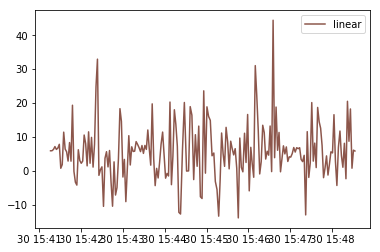

In [42]:
import matplotlib.pyplot as plt

time_stp = []
sens_val = []

## Generate the data list
for sens,data in sensor_data.items():
    if sens=="GYROSCOPE":
        for dat in data:
            sens_val.append(dat.getvalues()[0])
            time_stp.append(dat.gettimestamp())

x = [datetime.datetime.strptime(elem, '%Y-%m-%d %H:%M:%S.%f') for elem in time_stp]
            
print(len(x),len(sens_val))
# Plot the data
plt.plot(x,sens_val, label='linear')
# Add a legend
plt.legend()
# Show the plot
plt.show()